In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

In [49]:
single_img_path = '/Users/rasmusjensen/Desktop/Fagprojekt filer/bbbc021/singlecell/singh_cp_pipeline_singlecell_images'
plate = 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10'
cell = 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_0.npy'
single_img_plate = os.path.join(single_img_path, plate)

In [50]:
data = np.load(os.path.join(single_img_path, plate, cell))
data = (data / np.max(data) * 255).astype(np.uint8)

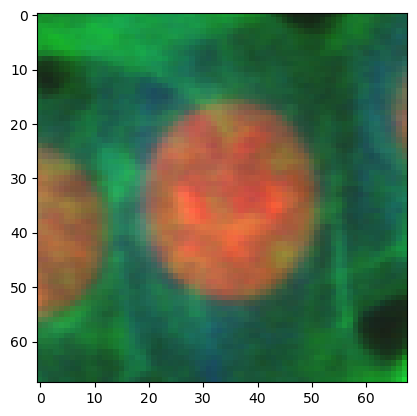

In [51]:
# Single-cell plot
plt.imshow(data, cmap='gray')

In [60]:
def extract_id(file_name):
    return int(file_name.split('_')[-1].split('.')[0])

In [61]:
np_files = [file for file in os.listdir(single_img_plate) if file.endswith('.npy')]
np_files =  sorted(np_files, key=extract_id)
print(np_files)

['B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_0.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_1.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_2.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_3.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_4.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_5.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_6.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_7.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_8.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_9.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_10.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_11.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_12.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_13.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_14.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_15.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_16.npy', 'B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10_17.npy', '

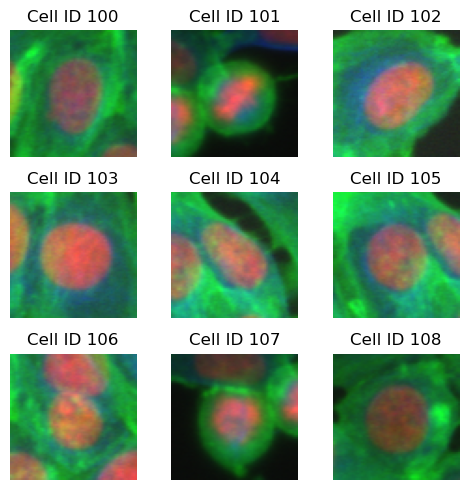

In [87]:
np_files = [os.path.join(np_files_path, file) for file in os.listdir(np_files_path) if file.endswith('.npy')]
np_files.sort(key=extract_id) 

np_files_subset = np_files[100:109]

fig, axs = plt.subplots(3, 3, figsize=(5, 5))

for idx, (ax, file) in enumerate(zip(axs.ravel(), np_files_subset)):
    cell_image = np.load(os.path.join(single_img_plate, file))
    cell_image_normalized = cell_image / cell_image.max()
    cell_id = file.split('_')[-1].split('.')[0]
    
    ax.imshow(cell_image_normalized)
    ax.axis('off')
    ax.set_title(f'Cell ID {cell_id}')

plt.tight_layout()
plt.savefig('singlecell_images_10.png')
plt.show()


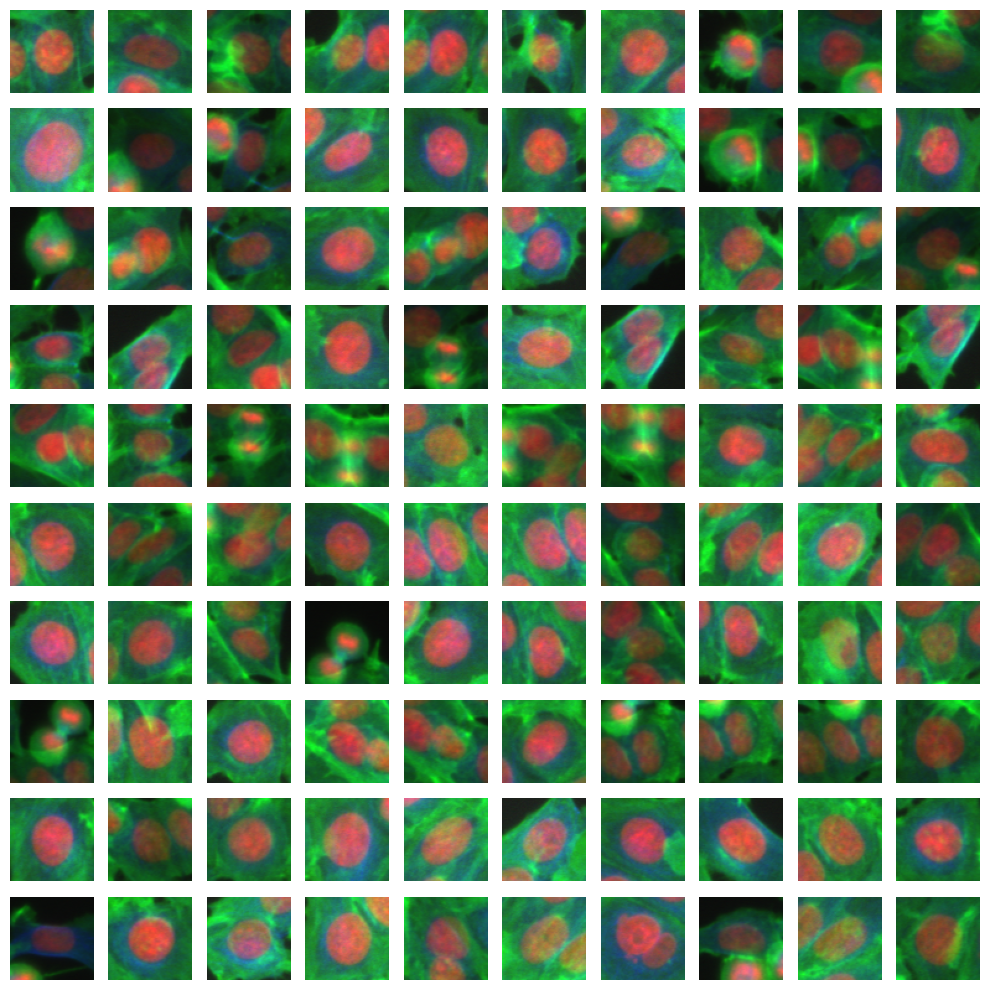

In [88]:
np_files_100 = np_files[0:100]



fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for idx, (ax, file) in enumerate(zip(axs.ravel(), np_files)):
    cell_image = np.load(file)
    cell_id = file.split('_')[-1].split('.')[0]
    cell_image_normalized = cell_image / cell_image.max()

    ax.imshow(cell_image_normalized)
    ax.axis('off')
    #ax.set_title(f'Cell ID {cell_id}')  

plt.tight_layout()
#plt.savefig('singlecell_images_100.png')
plt.show()

